In [176]:
from gensim.models.doc2vec import Doc2Vec, TaggedDocument
import nltk
import glob
import os
import string
import logging
import pandas as pd

In [98]:
logging.basicConfig(format='%(asctime)s : %(levelname)s : %(message)s', level=logging.INFO)

{tag: path} and the path will be later replaced with the cleaned document text.

In [73]:
preprints = glob.glob('corpus/*[.txt]')
documents = {os.path.splitext(os.path.basename(preprint))[0]: preprint for preprint in preprints}

In [74]:
# Prepare data
for doc in documents: 
    with open(documents[doc], 'r') as file:
        text = file.read().split(' ')
        table = str.maketrans('', '', string.punctuation)
        stripped = ' '.join([w.translate(table) for w in text])
        documents[doc] = stripped
    

In [76]:
len(documents)

40

In [103]:
class PreprintIterator(object):
    def __iter__(self):
        preprints = glob.glob('corpus/*[.txt]')
        for preprint in preprints:
            with open(preprint, 'r') as file:
                tag = os.path.splitext(os.path.basename(preprint))[0]
                text = file.read().split(' ')
                table = str.maketrans('', '', string.punctuation)
                stripped = ' '.join([w.translate(table) for w in text])
                yield TaggedDocument(words=nltk.word_tokenize(stripped), tags=[tag])

Hyphenated words become one word, e.g. spectroscopically-confirmed --> spectroscopicallyconfirmed. 

In [77]:
tagged_data = [TaggedDocument(words=nltk.word_tokenize(documents[d].lower()), tags=[d]) for d in documents]

In [80]:
tagged_data

[TaggedDocument(words=['highenergy', 'observations', 'performed', 'in', 'the', 'last', 'two', 'decades', 'have', 'unveiled', 'the', 'existence', 'of', 'a', 'few', 'unusual', 'classes', 'of', 'neutron', 'stars', 'nss', 'see', 'popov', '2007', 'for', 'a', 'review', 'the', 'anomalous', 'xray', 'pulsars', 'axps', 'and', 'the', 'soft', 'gammaray', 'repeaters', 'sgrs', 'are', 'among', 'them', 'the', 'most', 'peculiar', 'objects', 'see', 'woods', 'thompson', '2006', 'for', 'a', 'recent', 'review', 'at', 'variance', 'with', 'the', 'majority', 'of', 'the', 'nss', 'known', 'so', 'far', 'ie', 'the', 'radio', 'pulsars', 'they', 'are', 'typically', 'radio', 'quiet', 'but', 'show', 'xray', 'pulsations', 'at', 'periods', 'of', 'a', 'few', 'seconds', 'furthermore', 'the', 'xray', 'luminosity', 'of', 'both', 'sgrs', 'and', 'axps', 'largely', 'exceeds', 'their', 'rotational', 'energy', 'while', 'the', 'rotational', 'energy', 'of', 'radio', 'pulsars', 'can', 'easily', 'account', 'for', 'their', 'xray', '

In [127]:
doc_iterator = PreprintIterator()
model = Doc2Vec(documents=doc_iterator,
                workers=4, # num of cpus
                vector_size=100,
                alpha=0.025, 
                min_alpha=0.00025,
                min_count=1,
                dm=1,
                epochs=4)
  
# model.build_vocab(tagged_data)

model.save("d2v.model")
print("Model Saved")

2019-03-07 23:50:07,280 : INFO : collecting all words and their counts
2019-03-07 23:50:07,392 : INFO : PROGRESS: at example #0, processed 0 words (0/s), 0 word types, 0 tags
2019-03-07 23:53:35,817 : INFO : collected 162208 word types and 4091 unique tags from a corpus of 4091 examples and 19197673 words
2019-03-07 23:53:35,818 : INFO : Loading a fresh vocabulary
2019-03-07 23:53:36,984 : INFO : effective_min_count=1 retains 162208 unique words (100% of original 162208, drops 0)
2019-03-07 23:53:36,986 : INFO : effective_min_count=1 leaves 19197673 word corpus (100% of original 19197673, drops 0)
2019-03-07 23:53:38,246 : INFO : deleting the raw counts dictionary of 162208 items
2019-03-07 23:53:38,251 : INFO : sample=0.001 downsamples 27 most-common words
2019-03-07 23:53:38,252 : INFO : downsampling leaves estimated 14761658 word corpus (76.9% of prior 19197673)
2019-03-07 23:53:39,089 : INFO : estimated required memory for 162208 words and 100 dimensions: 213325000 bytes
2019-03-07

Model Saved


In [177]:
from gensim.models.doc2vec import Doc2Vec
model= Doc2Vec.load("d2v.model")
#to find the vector of a document which is not in training data
test_data = word_tokenize("This star in a galaxy far away.".lower())
v1 = model.infer_vector(test_data)
print("V1_infer", v1)

# to find most similar doc using tags
similar_doc = model.docvecs.most_similar('0706.2614')
print(similar_doc)

# to find vector of doc in training data using tags or in other words, printing the vector of document at index 1 in training data
print(model.docvecs['0706.2614'])

2019-03-08 19:40:40,681 : INFO : loading Doc2Vec object from d2v.model
2019-03-08 19:40:43,424 : INFO : loading vocabulary recursively from d2v.model.vocabulary.* with mmap=None
2019-03-08 19:40:43,438 : INFO : loading trainables recursively from d2v.model.trainables.* with mmap=None
2019-03-08 19:40:43,440 : INFO : loading syn1neg from d2v.model.trainables.syn1neg.npy with mmap=None
2019-03-08 19:40:43,618 : INFO : loading wv recursively from d2v.model.wv.* with mmap=None
2019-03-08 19:40:43,624 : INFO : loading vectors from d2v.model.wv.vectors.npy with mmap=None
2019-03-08 19:40:43,859 : INFO : loading docvecs recursively from d2v.model.docvecs.* with mmap=None
2019-03-08 19:40:43,867 : INFO : loaded d2v.model
2019-03-08 19:40:44,827 : INFO : precomputing L2-norms of doc weight vectors


V1_infer [-0.0192561  -0.05107146 -0.00829334 -0.01615542 -0.03019439 -0.07401006
  0.0248628   0.01136784 -0.0131525  -0.03735767 -0.02409497 -0.07008603
 -0.05142878 -0.04542723 -0.00127235 -0.09628256  0.02548563 -0.00198154
  0.02713924  0.01719282  0.04496053  0.01230542 -0.0190478  -0.01263209
 -0.00739184 -0.02976726  0.0452339  -0.03339921 -0.01013194 -0.03307556
 -0.00715468 -0.01804242 -0.02832633 -0.00771612 -0.00655983  0.02977278
  0.05568732 -0.00893298 -0.05444293 -0.01461269 -0.05325412 -0.00938501
  0.04910823 -0.00579968  0.01923828 -0.02586871  0.01365636  0.00062169
 -0.02056554  0.02986195 -0.01332028  0.02429657  0.02127757 -0.00468081
  0.03025374 -0.01417414  0.00356278 -0.04162825  0.02490039 -0.02975488
  0.07352471  0.01379925 -0.02539797 -0.0755726   0.00053236 -0.0277083
 -0.04722292  0.00141717  0.00745122  0.07577489  0.07148158 -0.02573278
 -0.00438994  0.03141847 -0.00405658 -0.01576183 -0.00669972 -0.01533375
 -0.00504134 -0.01335045 -0.00147695 -0.020

In [142]:
from scipy.spatial.distance import cosine as cosine_distance
vec_by_inference = model.infer_vector(['a', 'cat', 'was', 'in', 'a', 'hat'])
for doc_vec in model.docvecs:   
    dist = cosine_distance(doc_vec, vec_by_inference)
    print(dist)
#vec_by_doctag = model.docvecs["1"] 

0.5754896998405457
0.6377313435077667
0.5369927883148193
0.6011914908885956
0.6803090572357178
0.5115698277950287
0.7554049342870712
0.6373738646507263
0.7041270136833191
0.5298436284065247
0.7321628630161285
0.6174668669700623
0.6596224009990692
0.666938453912735
0.6509347558021545
0.6632419228553772
0.6039679050445557
0.5471544563770294
0.5552180707454681
0.6658114790916443
0.6503990888595581
0.6447593569755554
0.438578724861145
0.665446937084198
0.6371497809886932
0.7307512164115906
0.5964736342430115
0.6698395013809204
0.5940175950527191
0.5810645520687103
0.6630425453186035
0.6092747151851654
0.6438713669776917
0.709661990404129
0.542081207036972
0.5918209850788116
0.6245832741260529
0.5490896701812744
0.5099265277385712
0.5930172502994537
0.6199925243854523
0.6123059093952179
0.6170263588428497
0.6929678618907928
0.6858757734298706
0.5217674076557159
0.44238340854644775
0.7389519214630127
0.7306174039840698
0.6040933132171631
0.5139569342136383
0.671022355556488
0.660030990839004

KeyError: "tag '4091' not seen in training corpus/invalid"

In [11]:
model.wv.most_similar('machine', topn=20)

[(u'computer', 0.6484411358833313),
 (u'hardware', 0.6476787328720093),
 (u'adaptive', 0.6187836527824402),
 (u'integrator', 0.6024171113967896),
 (u'memory', 0.601749062538147),
 (u'digital', 0.6010499000549316),
 (u'learning', 0.6004334688186646),
 (u'clock', 0.5951841473579407),
 (u'RungeKutta', 0.593598484992981),
 (u'chopper', 0.5927006602287292),
 (u'corrector', 0.5896614789962769),
 (u'Adaptive', 0.5894516706466675),
 (u'readout', 0.5887627601623535),
 (u'Event', 0.5881361961364746),
 (u'VESPA', 0.5876585245132446),
 (u'St\xfcckelberg', 0.5847300291061401),
 (u'management', 0.581948459148407),
 (u'mesh', 0.5813798904418945),
 (u'leapfrog', 0.5807925462722778),
 (u'graphics', 0.5738794803619385)]

Sort articles by subject

In [32]:
metadata_filepath = 'arxiv_metadata_astroph.csv'
metadata_df = pd.read_csv(metadata_filepath, 
                           dtype={'filename': str,
                                  'filename_parsed': str,
                                  'identifier': str,
                                  'updated': str,
                                  'doi': str}, 
                           parse_dates=['date_retrieved'])
metadata_df

,abstract,authors,categories,comments,created,date_retrieved,datestamp,doi,filename,filename_parsed,identifier,journal,spec,title,updated
0,We discuss the results from the combined IRA...,"Paul Harvey, Bruno Merin, Tracy L. Huard, Luis...",astro-ph,NaN,2007-04-02,2019-02-12 06:42:16,2010-03-18,10.1086/518646,0704.0009,0704.0009,oai:arXiv.org:0704.0009,"Astrophys.J.663:1149-1173,2007",physics:astro-ph,"The Spitzer c2d Survey of Large, Nearby, Inste...",NaN
1,Results from spectroscopic observations of t...,"Nceba Mhlahlo, David H. Buckley, Vikram S. Dhi...",astro-ph,NaN,2007-03-31,2019-02-12 06:42:16,2009-06-23,10.1111/j.1365-2966.2007.11762.x,0704.0017,0704.0017,oai:arXiv.org:0704.0017,"Mon.Not.Roy.Astron.Soc.378:211-220,2007",physics:astro-ph,Spectroscopic Observations of the Intermediate...,NaN
2,"The very nature of the solar chromosphere, i...","M. A. Loukitcheva, S. K. Solanki, S. White",astro-ph,NaN,2007-03-31,2019-02-12 06:42:16,2009-06-23,10.1007/s10509-007-9626-1,0704.0023,0704.0023,oai:arXiv.org:0704.0023,"Astrophys.Space Sci.313:197-200,2008",physics:astro-ph,ALMA as the ideal probe of the solar chromosphere,NaN
3,We present a theoretical framework for plasm...,"A. A. Schekochihin, S. C. Cowley, W. Dorland, ...",astro-ph nlin.CD physics.plasm-ph physics.spac...,NaN,2007-03-31,2019-02-12 06:42:16,2015-05-13,10.1088/0067-0049/182/1/310,0704.0044,0704.0044,oai:arXiv.org:0704.0044,"ApJS 182, 310 (2009)",physics:astro-ph,Astrophysical gyrokinetics: kinetic and fluid ...,2009-05-09
4,We report on the analysis of selected single...,"Alexander Stroeer, John Veitch, Christian Roev...",gr-qc astro-ph,NaN,2007-03-31,2019-02-12 06:42:16,2008-11-26,10.1088/0264-9381/24/19/S17,0704.0048,0704.0048,oai:arXiv.org:0704.0048,"Class.Quant.Grav.24:S541-S550,2007",physics:astro-ph,Inference on white dwarf binary systems using ...,2007-04-03
5,We derive masses and radii for both componen...,"T. G. Beatty, J. M. Fernandez, D. W. Latham, G...",astro-ph,NaN,2007-03-31,2019-02-12 06:42:16,2009-06-23,10.1086/518413,0704.0059,0704.0059,oai:arXiv.org:0704.0059,"Astrophys.J.663:573-582,2007",physics:astro-ph,The Mass and Radius of the Unseen M-Dwarf Comp...,2007-04-09
6,We show that the globular cluster mass funct...,"Dean E. McLaughlin, S. Michael Fall",astro-ph,NaN,2007-04-01,2019-02-12 06:42:16,2010-11-11,10.1086/533485,0704.0080,0704.0080,oai:arXiv.org:0704.0080,"Astrophys.J.679:1272-1287,2008",physics:astro-ph,Shaping the Globular Cluster Mass Function by ...,2008-06-11
7,We present semi-analytical constraint on the...,HongSheng Zhao,astro-ph,NaN,2007-04-02,2019-02-12 06:42:16,2007-05-23,NaN,0704.0094,0704.0094,oai:arXiv.org:0704.0094,NaN,physics:astro-ph,Timing and Lensing of the Colliding Bullet Clu...,NaN
8,Context. Swift data are revolutionising our ...,"P. A. Evans, A. P. Beardmore, K. L. Page, L. G...",astro-ph,NaN,2007-04-02,2019-02-12 06:42:16,2009-11-13,10.1051/0004-6361:20077530,0704.0128,0704.0128,oai:arXiv.org:0704.0128,NaN,physics:astro-ph,An online repository of Swift/XRT light curves...,2007-04-19
9,We report the first detection of the 6.2micr...,"D. Lutz, E. Sturm, L. J. Tacconi, E. Valiante,...",astro-ph,NaN,2007-04-02,2019-02-12 06:42:16,2009-11-13,10.1086/518537,0704.0133,0704.0133,oai:arXiv.org:0704.0133,NaN,physics:astro-ph,PAH emission and star formation in the host of...,NaN


Subjects:

In [53]:
unique, counts = np.unique(np.concatenate(metadata_df['categories'].str.split()), return_counts=True)
print(np.asarray((unique, counts)).T)

[['acc-phys' '1']
 ['adap-org' '14']
 ['alg-geom' '3']
 ['astro-ph' '105362']
 ['astro-ph.CO' '46608']
 ['astro-ph.EP' '15354']
 ['astro-ph.GA' '34958']
 ['astro-ph.HE' '32595']
 ['astro-ph.IM' '14971']
 ['astro-ph.SR' '37698']
 ['atom-ph' '8']
 ['bayes-an' '3']
 ['chao-dyn' '74']
 ['chem-ph' '2']
 ['comp-gas' '11']
 ['cond-mat' '193']
 ['cond-mat.dis-nn' '29']
 ['cond-mat.mes-hall' '62']
 ['cond-mat.mtrl-sci' '141']
 ['cond-mat.other' '121']
 ['cond-mat.quant-gas' '76']
 ['cond-mat.soft' '78']
 ['cond-mat.stat-mech' '584']
 ['cond-mat.str-el' '57']
 ['cond-mat.supr-con' '184']
 ['cs.AI' '27']
 ['cs.CC' '4']
 ['cs.CE' '45']
 ['cs.CG' '5']
 ['cs.CL' '2']
 ['cs.CR' '1']
 ['cs.CV' '97']
 ['cs.CY' '14']
 ['cs.DB' '37']
 ['cs.DC' '148']
 ['cs.DL' '114']
 ['cs.DM' '3']
 ['cs.DS' '10']
 ['cs.GR' '18']
 ['cs.HC' '19']
 ['cs.IR' '17']
 ['cs.IT' '63']
 ['cs.LG' '90']
 ['cs.MM' '5']
 ['cs.MS' '21']
 ['cs.NA' '18']
 ['cs.NE' '28']
 ['cs.NI' '10']
 ['cs.OH' '9']
 ['cs.OS' '1']
 ['cs.PF' '17']
 ['cs

The subjects we're interested in: 
- astro-ph
- astro-ph.GA
- astro-ph.SR
- astro-ph.CO
- astro-ph.IM
- astro-ph.HE
- astro-ph.EP

In [178]:
def get_preprints_by_subject(subject):
    preprints = metadata_df['categories'].str.startswith(subject)
    print(len(metadata_df[preprints]['filename_parsed'].tolist()))

get_preprints_by_subject('astro-ph.IM')

10296


In [179]:
# Get the document ids for those in corpus
preprints = [os.path.splitext(os.path.basename(preprint))[0] for preprint in glob.glob('corpus/*[.txt]')]
len(preprints) == len(features)

NameError: name 'features' is not defined

In [194]:
# Get the metadata for the parsed preprints 
parsed_metadata_df = metadata_df[metadata_df['filename_parsed'].isin(preprints)]
parsed_metadata_df

,abstract,authors,categories,comments,created,date_retrieved,datestamp,doi,filename,filename_parsed,identifier,journal,spec,title,updated
2319,Recent radio observations have unveiled the ...,"R. P. Mignani, R. Perna, N. Rea, G. L. Israel,...",astro-ph,NaN,2007-06-18,2019-02-12 06:42:16,2009-11-13,10.1051/0004-6361:20077486,0706.2573,0706.2573,oai:arXiv.org:0706.2573,NaN,physics:astro-ph,VLT/NACO observations of the High-Magnetic fie...,NaN
2320,The properties of narrow-line Seyfert 1 (NLS...,"Dawei Xu, Stefanie Komossa, Hongyan Zhou, Ting...",astro-ph,NaN,2007-06-18,2019-02-12 06:42:16,2009-11-13,10.1086/521697,0706.2574,0706.2574,oai:arXiv.org:0706.2574,NaN,physics:astro-ph,The narrow-line region of narrow-line and broa...,NaN
2321,The transport of the nuclear cosmic ray flux...,"A. Putze, L. Derome, D. Maurin, M. Buénerd",astro-ph,NaN,2007-06-18,2019-02-12 06:42:16,2007-06-19,NaN,0706.2586,0706.2586,oai:arXiv.org:0706.2586,NaN,physics:astro-ph,Nuclear Cosmic Rays propagation in the Atmosphere,NaN
2322,We investigate the statistical properties of...,A. Asensio Ramos,astro-ph,NaN,2007-06-18,2019-02-12 06:42:16,2009-11-13,10.1051/0004-6361:20077574,0706.2590,0706.2590,oai:arXiv.org:0706.2590,NaN,physics:astro-ph,Extreme Value Theory and the Solar Cycle,NaN
2324,We propose that the baryon asymmetry of the ...,"Bjorn Garbrecht, Tomislav Prokopec",astro-ph,NaN,2007-06-18,2019-02-12 06:42:16,2008-12-18,10.1103/PhysRevD.78.123501,0706.2594,0706.2594,oai:arXiv.org:0706.2594,"Phys.Rev.D78:123501,2008",physics:astro-ph,Baryogenesis from the amplification of vacuum ...,NaN
2325,The propagation of UHECRs is affected by the...,"Hyesung Kang, Santabrata Das, Dongsu Ryu, Jung...",astro-ph,NaN,2007-06-18,2019-02-12 06:42:16,2008-11-26,10.1088/1742-6596/120/6/062025,0706.2597,0706.2597,oai:arXiv.org:0706.2597,"J.Phys.Conf.Ser.120:062025,2008",physics:astro-ph,Propagation of UHE protons through a magnetize...,2007-08-22
2326,We address the question of designing isotrop...,"Frédéric Guilloux, Gilles Fay, Jean-François C...",math.NA astro-ph math.CA math.ST stat.TH,NaN,2007-06-18,2019-02-12 06:42:16,2007-06-19,NaN,0706.2598,0706.2598,oai:arXiv.org:0706.2598,NaN,physics:astro-ph,Practical wavelet design on the sphere,NaN
2327,We present new observations with the IRAM In...,"D. Downes, A. Eckart",astro-ph,NaN,2007-06-18,2019-02-12 06:42:16,2009-11-13,10.1051/0004-6361:20077301,0706.2599,0706.2599,oai:arXiv.org:0706.2599,"Astron.Astrophys.468:L57,2007",physics:astro-ph,Black hole in the West Nucleus of Arp 220,NaN
2328,Gravitational lensing provides an efficient ...,M. Sereno,astro-ph,NaN,2007-06-18,2019-02-12 06:42:16,2009-11-13,10.1111/j.1365-2966.2007.12126.x,0706.2607,0706.2607,oai:arXiv.org:0706.2607,NaN,physics:astro-ph,Kinematic effect in gravitational lensing by c...,NaN
2329,Relative astrometric measurements with a pre...,"Andreas Seifahrt, Tristan Roell, Ralph Neuhaeuser",astro-ph,NaN,2007-06-18,2019-02-12 06:42:16,2015-05-13,10.1007/978-3-540-76963-7_37,0706.2613,0706.2613,oai:arXiv.org:0706.2613,NaN,physics:astro-ph,Probing micro-arcsec astrometry with NACO,NaN


In [199]:
# Get the main category for each parsed preprint
parsed_categories_df = parsed_metadata_df['categories'].str.split().str.get(0).reset_index(drop=True)
category_keys = parsed_categories_df.value_counts()[:5].keys()
category_keys

Index(['astro-ph', 'gr-qc', 'hep-th', 'hep-ph', 'nucl-th'], dtype='object')

In [181]:
import numpy as np
import pandas as pd
from seaborn import color_palette,palplot
from IPython.core.display import display
from matplotlib import pyplot as plt
import matplotlib as mpl
%matplotlib inline

In [182]:
# the resulting feature vectors are stored in `model.docvecs.doctag_syn0`, so let's just save that numpy array
np.save('features.npy',model.docvecs.vectors_docs)

In [184]:
features = np.load('features.npy')
print(len(features))

4091


In [192]:
# now we write the data to file in the required LargeVis format (which requires a header with the number of items and the dimensionality of the feature vectors)
with open('lv_format.txt','w') as out:
    out.write("{}\t{}\n".format(*features.shape))
    for row in features:
        out.write('\t'.join(row.astype(str))+'\n')

In [186]:
# Get LargeVis 2D embedding -- need to run this using Python 2 (probably best to start a new notebook idk)
import LargeVis

outdim = 2
threads = 24
samples = -1
prop = -1
alpha = -1
trees = -1
neg = -1
neigh = -1
gamma = -1
perp = -1

LargeVis.loadfile("lv_format.txt")
Y = LargeVis.run(outdim, threads, samples, prop, alpha, trees, neg, neigh, gamma, perp)
LargeVis.save("lv_output.txt")

ModuleNotFoundError: No module named 'LargeVis'

Visualize:

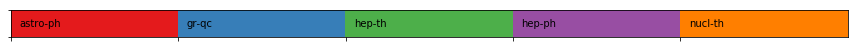

In [200]:
#https://jlorince.github.io/viz-tutorial/
def keyplot(pal, names):
    n = len(pal)
    rows = int(n / 5)
    if n%5 > 0:
        rows += 1
    f, axes = plt.subplots(rows, 1, figsize=(15, .5*rows))
    if rows ==1:
        axes = [axes,]
    for idx,ax in enumerate(axes):
        current_pal = pal[idx*5:(idx*5)+5]
        if len(current_pal)<5:
            current_pal += ['white']*(5-len(current_pal))
        current_names = names[idx*5:(idx*5)+5]
        ax.imshow(np.arange(5).reshape(1, 5),
                  cmap=mpl.colors.ListedColormap(list(current_pal)),
                  interpolation="nearest", aspect="auto")
        ax.set_xticks(np.arange(5) - .5)
        ax.set_yticks([-.5, .5])
        for i,name in enumerate(current_names):
            ax.annotate(name,(-.45+i,0.1))
        ax.set_xticklabels([])
        ax.set_yticklabels([])

# Example:
keyplot(color_palette('Set1',len(category_keys)),names=category_keys)

In [201]:
# be sure to skip the header row that LargeVis generates
data = pd.read_table('lv_output.txt',header=None,skiprows=1,names=['x','y'],delimiter=' ')
data

,x,y
0,6.626991,6.095891
1,-1.719058,12.758862
2,0.764280,-13.775023
3,1.328964,-9.300227
4,12.991714,-14.731377
5,6.653366,-3.122534
6,-3.881662,-11.531071
7,-0.513417,9.019189
8,8.776052,-7.336321
9,-10.809155,-3.833763


In [202]:
# Join categories to the data frame
data_joined = data.assign(category=parsed_categories_df)
data_joined

,x,y,category
0,6.626991,6.095891,astro-ph
1,-1.719058,12.758862,astro-ph
2,0.764280,-13.775023,astro-ph
3,1.328964,-9.300227,astro-ph
4,12.991714,-14.731377,astro-ph
5,6.653366,-3.122534,astro-ph
6,-3.881662,-11.531071,math.NA
7,-0.513417,9.019189,astro-ph
8,8.776052,-7.336321,astro-ph
9,-10.809155,-3.833763,astro-ph


In [203]:
# this is critical. Datashader depends on defining an image of a specified size in pixels
plot_width  = int(500)
plot_height = int(500)
background = "black"

import datashader as ds
import datashader.transfer_functions as tf
from functools import partial
from datashader.utils import export_image
from datashader.colors import colormap_select, Greys9, Hot, viridis, inferno
from IPython.core.display import HTML, display

# this function actually generates the datashader image 
export = partial(export_image, background = background, export_path="export")

# this handles colorinzing of the image
cm = partial(colormap_select, reverse=(background!="black"))

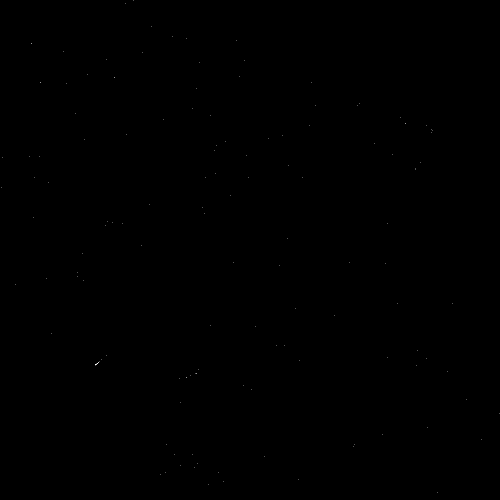

In [204]:
# define canvas of a specified dimension
cvs = ds.Canvas(plot_width, plot_height)
# aggregate *point* data into bins specified by the size of our image
# this amounts to defining a value for each *pixel* in the image
agg = cvs.points(data_joined, 'x', 'y')
# now use a transfer function to draw the image. In this case we shade each pixel 
# based on the number of of observations falling within each pixel
export(tf.shade(agg, cmap = cm(Greys9), how='linear'),'tempfile')

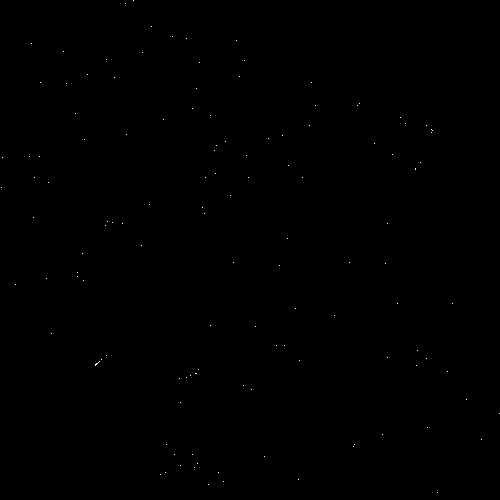

In [205]:
export(tf.shade(agg, cmap = cm(Greys9), how='eq_hist'),'tempfile')

In [220]:
# `cat` specifies which categorical column we want to color by, and topN limits plotting to the top N most common categories in that column
def create_image(w=plot_width, h=plot_height,cat=None,color_key=None,topN=5):
    # if we specify a `topN`, determined which are the top N most commmon categories, and limit the dataframe to the corresponding rows
    if topN is not None:
        topN = data_joined[cat].value_counts()[:topN].index.values
        df = data_joined[data_joined[cat].isin(topN)].copy()
    else:
        df = data_joined
    # now that we've done our sampling we can convert the column to a category type
    df[cat] = df[cat].astype('category')
    # unless we explicitly pass a {category:color} dictionary, generate the color map
    if color_key is None:
        unique_values = sorted(df[cat].unique())
        # this is s kludge to handle the fact that some plotting libraries don't handle seaborn color paletes well (just converting to hex color names)
        colors = ['#%02x%02x%02x' % (a, b, c) for a,b,c in np.round(255*np.array(color_palette('Set1',n_colors=len(unique_values)))).astype(int)]
        # use matplotlib to draw a legend
        keyplot(colors,unique_values)
        color_key = {val:color for val,color in zip(unique_values,colors)}    
        
    # now the plotting command is the sameas above, except we use a `color_key` arugment to tell datashader how to color each point
    cvs = ds.Canvas(plot_width=w, plot_height=h)
    agg = cvs.points(df, 'x', 'y', ds.count_cat(cat))
    img = tf.shade(agg, color_key=color_key, how='eq_hist')
    return img

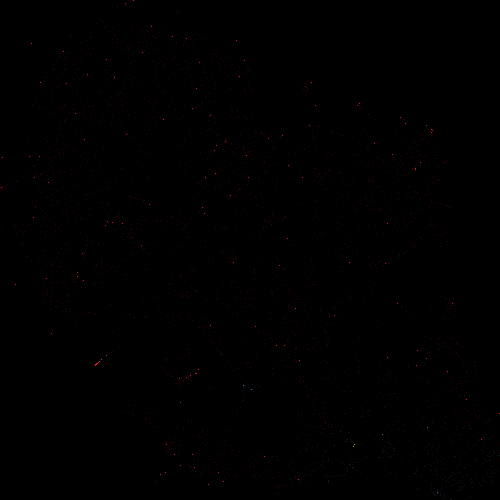

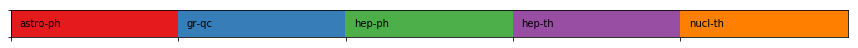

In [221]:
export(create_image(cat='category'),'tempfile')